In [111]:
from goatools.obo_parser import GODag
obodag = GODag("go-basic.obo")

go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms


In [245]:
from goatools.base import get_godag
godag = get_godag('go-basic.obo', optional_attrs='relationship')

  EXISTS: go-basic.obo
go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms; optional_attrs(relationship)


In [305]:
from goatools.godag.go_tasks import get_go2parents

go2parents = get_go2parents(gosubdag.go2obj, gosubdag.relationships)
sos='GO:0009432'
for goid in godag[sos].get_all_parents():
    gosubdag = GoSubDag(goid, godag, relationships=True, prt=False)
    ntgo = gosubdag.go2nt[goid]
    print(prtfmt.format(**ntgo._asdict()))

BP GO:0051716 D02 cellular response to stimulus
BP GO:0033554 D03 cellular response to stress
BP GO:0009987 D01 cellular process
BP GO:0006974 D04 DNA damage response
BP GO:0006950 D02 response to stress
BP GO:0008150 D00 biological_process
BP GO:0050896 D01 response to stimulus


In [306]:
for goid in godag[sos].get_all_upper():
    gosubdag = GoSubDag(goid, godag, relationships=True, prt=False)
    ntgo = gosubdag.go2nt[goid]
    print(prtfmt.format(**ntgo._asdict()))

BP GO:0051716 D02 cellular response to stimulus
BP GO:0033554 D03 cellular response to stress
BP GO:0009987 D01 cellular process
BP GO:0006974 D04 DNA damage response
BP GO:0006950 D02 response to stress
BP GO:0008150 D00 biological_process
BP GO:0050896 D01 response to stimulus


In [311]:
print(godag[sos].get_all_upper())

{'GO:0051716', 'GO:0033554', 'GO:0009987', 'GO:0006974', 'GO:0006950', 'GO:0008150', 'GO:0050896'}


{('GO:0009432', 'GO:0006974'), ('GO:0051716', 'GO:0050896'), ('GO:0051716', 'GO:0009987'), ('GO:0033554', 'GO:0051716'), ('GO:0050896', 'GO:0008150'), ('GO:0006974', 'GO:0033554'), ('GO:0009987', 'GO:0008150'), ('GO:0033554', 'GO:0006950'), ('GO:0006950', 'GO:0050896')}


In [302]:
godag[goid].get_all_parents()

{'id': 'GO:0051716',
 'item_id': 'GO:0051716',
 'name': 'cellular response to stimulus',
 'namespace': 'biological_process',
 '_parents': {'GO:0009987', 'GO:0050896'},
 'parents': {GOTerm('GO:0009987'):
    id:GO:0009987
    item_id:GO:0009987
    name:cellular process
    namespace:biological_process
    _parents: 1 items
      GO:0008150
    parents: 1 items
      GO:0008150	level-00	depth-00	biological_process [biological_process]
    children: 62 items
    level:1
    depth:1
    is_obsolete:False
    alt_ids: 3 items
      GO:0008151
      GO:0044763
      GO:0050875
    relationship: 0 items
    relationship_rev: 3 items
      regulates: 2 items
        GO:0050794	level-03	depth-03	regulation of cellular process [biological_process]
        GO:0044068	level-04	depth-05	symbiont-mediated perturbation of host cellular process [biological_process]
      positively_regulates: 1 items
        GO:0048522	level-04	depth-04	positive regulation of cellular process [biological_process]
   

In [280]:
from goatools.gosubdag.gosubdag import GoSubDag
goid = 'GO:0009432'
# Create a subset of the GO DAG which contains:
#   * The selected GO term and
#   * All the GO terms above it
gosubdag = GoSubDag(goid, godag, relationships=True, prt=False)

# Get additional information for chosen GO
ntgo = gosubdag.go2nt[goid]

# Choose fields and custom printing format
# prt_flds(gosubdag)  # Uncomment to see the available print fields
prtfmt = '{NS} {GO} D{depth:02} {GO_name}'

# Print detailed information for GO
print(prtfmt.format(**ntgo._asdict()))

BP GO:0009432 D05 SOS response


    1 usr   8 GOs  WROTE: GO.png


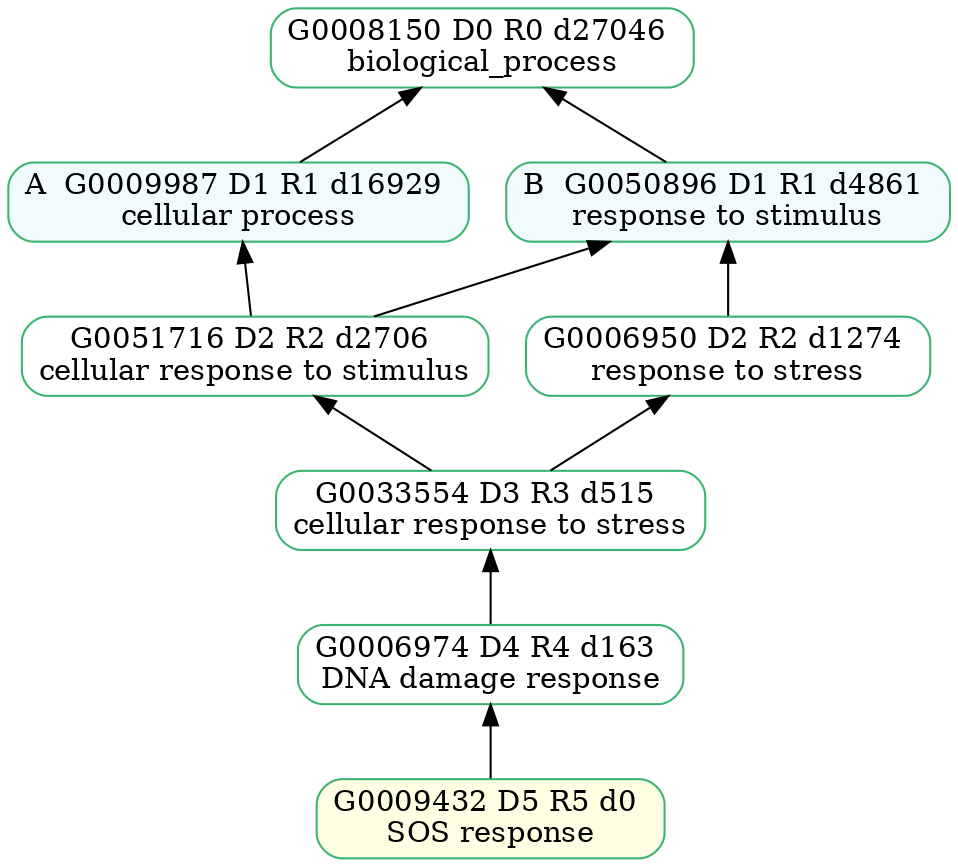

In [283]:
from goatools.gosubdag.plot.gosubdag_plot import GoSubDagPlot
GoSubDagPlot(gosubdag).plt_dag('GO.png')
#plot image in notebook
from IPython.display import Image
#plot high resolution image
Image(filename='GO.png',width=800, height=400)



In [287]:
def extract_ancestors(goid):
    """Extract all ancestors for a given GO term."""
    gosubdag = GoSubDag(goid, godag, relationships=True, prt=False)
    go2ancestors = gosubdag.rcntobj.go2ancestors
    if goid not in go2ancestors:
        print("No ancestors found for {GO}".format(GO=goid))
        return [goid]
    return [go2ancestors[goid]]+[goid]
print(extract_ancestors(goid))

[{'GO:0051716', 'GO:0033554', 'GO:0009987', 'GO:0006974', 'GO:0006950', 'GO:0008150', 'GO:0050896'}, 'GO:0009432']


In [121]:
from goatools.godag.go_tasks import get_go2parents

go2parents = get_go2parents(gosubdag.go2obj, gosubdag.relationships)
for goid_parent in go2parents[goid]:
    print(prtfmt.format(**gosubdag.go2nt[goid_parent]._asdict()))

BP GO:0048311 D06 mitochondrion distribution
BP GO:0048308 D05 organelle inheritance


In [286]:
print(godag[goid].get_all_parents())

{'GO:0051716', 'GO:0033554', 'GO:0009987', 'GO:0006974', 'GO:0006950', 'GO:0008150', 'GO:0050896'}


In [122]:

goterm = godag[goid]

print('Parents up "is_a": required relationship')
for p_term in goterm.parents:
    print(prtfmt.format(**gosubdag.go2nt[p_term.item_id]._asdict()))
    
if 'part_of' in goterm.relationship:
    print('\nParents up "part_of" optional relationship:')
    for p_go in goterm.relationship['part_of']:
        print(prtfmt.format(**gosubdag.go2nt[p_go.item_id]._asdict()))
        
if 'regulates' in goterm.relationship:
    print('\nParents up "regulates" optional relationship:')
    for p_go in goterm.relationship['regulates']:
        print(prtfmt.format(**gosubdag.go2nt[p_go.item_id]._asdict()))

# godag must be loaded with: optional_attrs='relationship'
# gosubdag must be loaded with: relationships=True
print('\nAncestors up all loaded relationships:')
for p_go in gosubdag.rcntobj.go2ancestors[goid]:
    print(prtfmt.format(**gosubdag.go2nt[p_go]._asdict()))

Parents up "is_a": required relationship
BP GO:0048308 D05 organelle inheritance
BP GO:0048311 D06 mitochondrion distribution

Ancestors up all loaded relationships:
BP GO:0051640 D02 organelle localization
BP GO:0008150 D00 biological_process
BP GO:0051646 D03 mitochondrion localization
BP GO:0016043 D03 cellular component organization
BP GO:0071840 D02 cellular component organization or biogenesis
BP GO:0048308 D05 organelle inheritance
BP GO:0006996 D04 organelle organization
BP GO:0051179 D01 localization
BP GO:0009987 D01 cellular process
BP GO:0048311 D06 mitochondrion distribution
BP GO:0007005 D05 mitochondrion organization


In [145]:
operoniscore
df_ann=pd.read_csv("/home/davide/Desktop/CCMEE29Annotazioni.csv")
df=pd.merge(operoniscore,df_ann,on="protein_id",how="left")
#drop duplicates of sequence_name,protein_id

df.drop_duplicates(subset =["sequence_name","protein_id"], keep = 'first', inplace = True)
df

,sequence_name,operone,lunghezza_intergenica,score,score_refined,motivo,posizione,info_geni,protein_id,GOs_interpro,GOs_eggnog,product,gene,GO_process,GO_component,GO_function,GO_process_pannzer2,KEGG_brite,pathways
0,LAU37_RS00015,WP_250123596.1,300,3.87,3.72,CAGTGTAATTGCTCGG,-184,Gene WP_250123596.1. Score ortologhi= SAG_39.7...,WP_250123596.1,GO:0000162(InterPro)|GO:0004049(InterPro),-,anthranilate synthase,NaN,['GO:0000162 - tryptophan biosynthetic process...,NaN,['GO:0004049 - anthranilate synthase activity ...,['GO:0000162 - tryptophan biosynthetic process...,NaN,"Metabolic pathways, Biosynthesis of secondary ..."
1,LAU37_RS00020,WP_250123597.1,49,-3.79,-3.91,CAGCAATCAATTTCTT,-43,Gene WP_250123597.1. Score ortologhi= SAG_39.7...,WP_250123597.1,-,"GO:0003674,GO:0003824,GO:0004425,GO:0016829,GO...",indole-3-glycerol phosphate synthase TrpC,trpC,['GO:0006568 - tryptophan metabolic process [E...,NaN,['GO:0004425 - indole-3-glycerol-phosphate syn...,NaN,NaN,"Metabolic pathways, Biosynthesis of secondary ..."
2,LAU37_RS00025,WP_250123598.1,79,-2.62,-2.35,TTGGACATAACTGCTT,-76,Gene WP_250123598.1. Score ortologhi= SAG_39.7...,WP_250123598.1,-,-,tryptophan synthase subunit alpha,trpA,['GO:0000162 - tryptophan biosynthetic process...,NaN,['GO:0004834 - tryptophan synthase activity [E...,NaN,NaN,"Metabolic pathways, Biosynthesis of secondary ..."
3,LAU37_RS00030,WP_250123599.1,297,0.98,1.07,GAAAATACCTGAACTT,-34,Gene WP_250123599.1. Score ortologhi= SAG_39.7...,WP_250123599.1,GO:0004834(InterPro)|GO:0006568(InterPro),"GO:0000162,GO:0005575,GO:0005622,GO:0005623,GO...",tryptophan synthase subunit beta,trpB,['GO:0000162 - tryptophan biosynthetic process...,NaN,['GO:0004834 - tryptophan synthase activity [E...,GO:0000162 - tryptophan biosynthetic process,NaN,"Metabolic pathways, Biosynthesis of secondary ..."
4,LAU37_RS00035,WP_250123600.1|WP_250123601.1,130,-2.91,-3.23,TTCTTCCCCTGCTCCC,-73,Gene WP_250123600.1. Score ortologhi= SAG_39.7...,WP_250123600.1,-,-,3-deoxy-7-phosphoheptulonate synthase,aroF,['GO:0009423 - chorismate biosynthetic process...,NaN,['GO:0003849 - 3-deoxy-7-phosphoheptulonate sy...,NaN,NaN,"Metabolic pathways, Biosynthesis of secondary ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,LAU37_RS27630,WP_250126534.1,300,0.39,0.77,ATGCACTGCTGTACGC,-264,Gene WP_250126534.1. Score ortologhi= SAG_39.7...,WP_250126534.1,-,NaN,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8009,LAU37_RS27625,WP_250126533.1|WP_250126532.1,70,-3.82,-5.14,GTGTAAGTTGCCCCCG,-69,Gene WP_250126533.1. Score ortologhi= TS-821: ...,WP_250126533.1,-,-,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8010,LAU37_RS27625,WP_250126533.1|WP_250126532.1,70,-3.82,-5.14,GTGTAAGTTGCCCCCG,-69,Gene WP_250126533.1. Score ortologhi= TS-821: ...,WP_250126532.1,GO:0005515(InterPro),-,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8011,LAU37_RS27615,WP_250126531.1,90,-0.89,-0.89,TAGCATTCACGCCCAG,-73,Gene WP_250126531.1. Score ortologhi= TS-821: ...,WP_250126531.1,NaN,-,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
import pandas as pd
operoniscore=pd.read_csv('scoresoperoni.txt',sep='\t',header=None,skiprows=1)
operoniscore.columns=["sequence_name","operone","lunghezza_intergenica","score","score_refined","motivo","posizione","info_geni"]
operoniscore["protein_id"]=operoniscore["operone"].str.split("|")
operoniscore=operoniscore.explode("protein_id")
df_ann=pd.read_csv("/home/davide/Desktop/CCMEE29Annotazioni.csv")
df=pd.merge(operoniscore,df_ann,on="protein_id",how="left")
df.drop_duplicates(subset =["sequence_name","protein_id"], keep = 'first', inplace = True)
df=df.sort_values(by="score_refined",ascending=False)
df=df.rename(columns={"sequence_name":"locus_tag_iniziooperone"})
#save as excel
import re


def extract_GO_terms(row):
    row_str = ' '.join(row.astype(str))
    go_terms = re.findall(r'GO:\d+', row_str)
    unique_go_terms = list(set(go_terms))
    return unique_go_terms

df['GOs'] = df.apply(extract_GO_terms, axis=1)
df.reset_index(drop=True, inplace=True)
df

,locus_tag_iniziooperone,operone,lunghezza_intergenica,score,score_refined,motivo,posizione,info_geni,protein_id,GOs_interpro,GOs_eggnog,product,gene,GO_process,GO_component,GO_function,GO_process_pannzer2,KEGG_brite,pathways,GOs
0,LAU37_RS16010,WP_250121493.1,300,10.52,21.04,TAGTATATCTGCACTA,-67,Gene WP_250121493.1. Score ortologhi= TS-821: ...,WP_250121493.1,GO:0003697(InterPro)|GO:0005524(InterPro)|GO:0...,"GO:0005575,GO:0005622,GO:0005623,GO:0005737,GO...",recombinase RecA,recA,"['GO:0006281 - DNA repair [Evidence IEA]', 'GO...",['GO:0005737 - cytoplasm [Evidence IEA]'],"['GO:0003677 - DNA binding [Evidence IEA]', 'G...","['GO:0009432 - SOS response', 'GO:0006310 - DN...",ko03400 DNA repair and recombination proteins,Homologous recombination,"[GO:0006139, GO:0005829, GO:0043170, GO:000943..."
1,LAU37_RS14470,WP_250121220.1,128,10.22,20.22,TAGTACGAATGTTCTA,-48,Gene WP_250121220.1. Score ortologhi= TS-821: ...,WP_250121220.1,-,"GO:0000976,GO:0001067,GO:0001130,GO:0001216,GO...",transcriptional repressor LexA,lexA,['GO:0006282 - regulation of DNA repair [Evide...,NaN,['GO:0004252 - serine-type endopeptidase activ...,NaN,"ko01002 Peptidases and inhibitors, ko03400 DNA...",NaN,"[GO:0051253, GO:0044212, GO:0031326, GO:004589..."
2,LAU37_RS14595,WP_250121243.1,300,10.43,19.29,TAGTACATATGTACTA,-208,Gene WP_250121243.1. Score ortologhi= SAG_39.7...,WP_250121243.1,-,-,ERF family protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,LAU37_RS21505,WP_250122517.1,300,9.18,17.92,GAGTACACTTGTACTG,-29,Gene WP_250122517.1. Score ortologhi= TS-821: ...,WP_250122517.1,GO:0003697(InterPro),-,single-stranded DNA-binding protein,NaN,NaN,NaN,NaN,GO:0006260 - DNA replication,"ko03032 DNA replication proteins, ko03400 DNA ...","DNA replication, Mismatch repair, Homologous r...","[GO:0003697, GO:0006260]"
4,LAU37_RS30680,WP_250126418.1,284,10.16,17.83,CAGTACATTTGTACTA,-137,Gene WP_250126418.1. Score ortologhi= TS-821: ...,WP_250126418.1,-,-,VOC family protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,LAU37_RS11015,WP_250125605.1,23,-8.68,-8.86,AATGACTCCTAGGAGA,-21,Gene WP_250125605.1. Score ortologhi= TS-821: ...,WP_250125605.1,GO:0006812(InterPro)|GO:0008324(InterPro),-,magnesium transporter,NaN,['GO:0006812 - monoatomic cation transport [Ev...,NaN,['GO:0008324 - monoatomic cation transmembrane...,NaN,ko02000 Transporters,NaN,"[GO:0006812, GO:0008324]"
6005,LAU37_RS04125,WP_250124362.1,31,-8.18,-8.90,GCGAGATTCCCTACCG,-29,Gene WP_250124362.1. Score ortologhi= TS-821: ...,WP_250124362.1,NaN,-,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
6006,LAU37_RS28140,WP_250126602.1,26,-8.99,-9.14,TGCAATCCAGGGAGCA,-21,Gene WP_250126602.1. Score ortologhi= SAG_39.7...,WP_250126602.1,NaN,-,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
6007,LAU37_RS01475,WP_250123865.1,33,-5.87,-9.23,GAGACTATTAATATTG,-19,Gene WP_250123865.1. Score ortologhi= TS-821: ...,WP_250123865.1,-,-,ATP-binding protein,NaN,NaN,NaN,NaN,"['GO:0016310 - phosphorylation', 'GO:0000160 -...",NaN,"Two-component system, Cell cycle - Caulobacter","[GO:0000160, GO:0016310]"


In [203]:
import polars as pl
dfpvalue=pl.read_csv("provastats.txt",separator="\t",has_header=False)
#create numpy arrays from the columns
import numpy as np
array1=dfpvalue["column_1"].to_numpy()
scores=dfpvalue["column_2"].to_numpy()
scoresrefined=dfpvalue["column_3"].to_numpy()
def calculate_pvalue(score):
    n=len(scores)
    pvalues=[]
    pvalues.append(np.sum(scores>score)/n)
    x=np.sum(scores>score)/n
    return x
def calculate_pvalue_refined(score_refined):
    #calculate number of elements in the array with score>score_refined
    n=len(scores)
    pvalues=[]
    pvalues.append(np.sum(scoresrefined>score_refined)/n)
    x=np.sum(scoresrefined>score_refined)/n
    return x
#now apply the function to the dataframe to create two new columns pvalue and pvalue_refined
df["pvalue"]=df["score"].apply(calculate_pvalue)
df["pvalue_refined"]=df["score_refined"].apply(calculate_pvalue_refined)
df

,locus_tag_iniziooperone,operone,lunghezza_intergenica,score,score_refined,motivo,posizione,info_geni,protein_id,GOs_interpro,...,gene,GO_process,GO_component,GO_function,GO_process_pannzer2,KEGG_brite,pathways,GOs,pvalue,pvalue_refined
0,LAU37_RS16010,WP_250121493.1,300,10.52,21.04,TAGTATATCTGCACTA,-67,Gene WP_250121493.1. Score ortologhi= TS-821: ...,WP_250121493.1,GO:0003697(InterPro)|GO:0005524(InterPro)|GO:0...,...,recA,"['GO:0006281 - DNA repair [Evidence IEA]', 'GO...",['GO:0005737 - cytoplasm [Evidence IEA]'],"['GO:0003677 - DNA binding [Evidence IEA]', 'G...","['GO:0009432 - SOS response', 'GO:0006310 - DN...",ko03400 DNA repair and recombination proteins,Homologous recombination,"[GO:0006139, GO:0005829, GO:0043170, GO:000943...",0.000000,0.000000
1,LAU37_RS14470,WP_250121220.1,128,10.22,20.22,TAGTACGAATGTTCTA,-48,Gene WP_250121220.1. Score ortologhi= TS-821: ...,WP_250121220.1,-,...,lexA,['GO:0006282 - regulation of DNA repair [Evide...,NaN,['GO:0004252 - serine-type endopeptidase activ...,NaN,"ko01002 Peptidases and inhibitors, ko03400 DNA...",NaN,"[GO:0051253, GO:0044212, GO:0031326, GO:004589...",0.000000,0.000000
2,LAU37_RS14595,WP_250121243.1,300,10.43,19.29,TAGTACATATGTACTA,-208,Gene WP_250121243.1. Score ortologhi= SAG_39.7...,WP_250121243.1,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0.000000,0.000000
3,LAU37_RS21505,WP_250122517.1,300,9.18,17.92,GAGTACACTTGTACTG,-29,Gene WP_250122517.1. Score ortologhi= TS-821: ...,WP_250122517.1,GO:0003697(InterPro),...,NaN,NaN,NaN,NaN,GO:0006260 - DNA replication,"ko03032 DNA replication proteins, ko03400 DNA ...","DNA replication, Mismatch repair, Homologous r...","[GO:0003697, GO:0006260]",0.000040,0.000000
4,LAU37_RS30680,WP_250126418.1,284,10.16,17.83,CAGTACATTTGTACTA,-137,Gene WP_250126418.1. Score ortologhi= TS-821: ...,WP_250126418.1,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,LAU37_RS11015,WP_250125605.1,23,-8.68,-8.86,AATGACTCCTAGGAGA,-21,Gene WP_250125605.1. Score ortologhi= TS-821: ...,WP_250125605.1,GO:0006812(InterPro)|GO:0008324(InterPro),...,NaN,['GO:0006812 - monoatomic cation transport [Ev...,NaN,['GO:0008324 - monoatomic cation transmembrane...,NaN,ko02000 Transporters,NaN,"[GO:0006812, GO:0008324]",0.999554,0.999789
6005,LAU37_RS04125,WP_250124362.1,31,-8.18,-8.90,GCGAGATTCCCTACCG,-29,Gene WP_250124362.1. Score ortologhi= TS-821: ...,WP_250124362.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0.999112,0.999800
6006,LAU37_RS28140,WP_250126602.1,26,-8.99,-9.14,TGCAATCCAGGGAGCA,-21,Gene WP_250126602.1. Score ortologhi= SAG_39.7...,WP_250126602.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0.999711,0.999866
6007,LAU37_RS01475,WP_250123865.1,33,-5.87,-9.23,GAGACTATTAATATTG,-19,Gene WP_250123865.1. Score ortologhi= TS-821: ...,WP_250123865.1,-,...,NaN,NaN,NaN,NaN,"['GO:0016310 - phosphorylation', 'GO:0000160 -...",NaN,"Two-component system, Cell cycle - Caulobacter","[GO:0000160, GO:0016310]",0.990187,0.999886


In [207]:
#replace nan values with empty string for column pathways
df["pathways"]=df["pathways"].fillna("")
df["KEGG_brite"]=df["KEGG_brite"].fillna("")
df.to_csv("operoniscore_annotato.csv",index=False)

In [208]:
from scipy.stats import hypergeom
from collections import Counter
from statsmodels.stats.multitest import multipletests
def kegg_brite_enrichment(pvalue,refined=True):
    col="pvalue_refined" if refined else "pvalue"
    df_cut=df[df[col]<pvalue]
    kegg_brite=df_cut["KEGG_brite"].str.split(", ").tolist()
    kegg_brite=[x for x in kegg_brite if str(x) != 'nan']
    KEGG_brite_terms=[item for sublist in kegg_brite for item in sublist]
    KEGG_brite_background = df["KEGG_brite"].str.split(", ").tolist()
    KEGG_brite_background=[x for x in KEGG_brite_background if str(x) != 'nan']
    KEGG_brite_background=[item for sublist in KEGG_brite_background for item in sublist]
    KEGG_BRITE_counts = Counter(KEGG_brite_terms)
    KEGG_BRITE_background_counts = Counter(KEGG_brite_background)
    
    M = len(df)  # Total number of genes
    n = len(df_cut)  # Number of genes with the motif at p-value < pvalue
    
    p_values = {}
    enrichments = {}
    genes = {}
    # Ensure KEGG_BRITE column is of string type
    df['KEGG_brite'] = df['KEGG_brite'].astype(str)
    
    # Replace NaN values with a string that doesn't occur in the other values
    df['KEGG_brite'] = df['KEGG_brite'].replace('nan', 'None')
    
    # Continue with your code...
    for term in KEGG_BRITE_counts:
        if term=="None":
            continue
        N = KEGG_BRITE_background_counts[term] 
        x = KEGG_BRITE_counts[term]
        enrichments[term] = (x/n)/(N/M)
        p_values[term] = hypergeom.sf(x-1, M, N, n)
        mask = df_cut['KEGG_brite'].str.contains(term)
        filtered_df = df_cut[mask][['operone', 'product']]
        filtered_df['combined'] = filtered_df.apply(lambda row: f"{str(row['operone'])}|{str(row['product'])}", axis=1)
        genes[term]=filtered_df['combined'].str.cat(sep=', ')
    
    # Now, results is a dictionary where the keys are KEGG_BRITE terms and the values are DataFrames containing the operon and product for each row that contains the term in the KEGG_BRITE column
    
    # Correct p-values for multiple testing
    terms=list(p_values.keys())
    pvals = list(p_values.values())
    corrected_pvals_bonferroni = multipletests(pvals, method='bonferroni')[1]  # Change 'bonferroni' to the method you prefer
    corrected_pvals_fdr = multipletests(pvals, method='fdr_bh')[1]  # Change 'fdr_bh' to the method you prefer
    
    
    data={'KEGG BRITE term':terms,'p-value':pvals,'corrected p-value Bonferroni':corrected_pvals_bonferroni,'corrected p-value FDR Benjamini/Hochberg':corrected_pvals_fdr}
    dfKEGG_BRITE = pd.DataFrame(data)
    dfKEGG_BRITE['enrichment'] = dfKEGG_BRITE['KEGG BRITE term'].map(enrichments)
    dfKEGG_BRITE["genes"]=dfKEGG_BRITE["KEGG BRITE term"].map(genes)
    dfKEGG_BRITE = dfKEGG_BRITE.sort_values(by='p-value', ascending=True)
    return dfKEGG_BRITE

In [209]:
kegg_brite_enrichment(0.05)

,KEGG BRITE term,p-value,corrected p-value Bonferroni,corrected p-value FDR Benjamini/Hochberg,enrichment,genes
0,ko03400 DNA repair and recombination proteins,0.000002,0.000035,0.000035,5.382801,"WP_250121493.1|recombinase RecA, WP_250121220...."
2,ko03032 DNA replication proteins,0.006081,0.133788,0.048927,5.304789,WP_250122517.1|single-stranded DNA-binding pro...
4,ko03036 Chromosome and associated proteins,0.006672,0.146780,0.048927,3.519524,WP_250126526.1|tyrosine-type recombinase/integ...
7,ko02048 Prokaryotic defense system,0.054882,1.000000,0.299133,2.772958,WP_250125134.1|cysteine desulfurase family pro...
1,ko01002 Peptidases and inhibitors,0.082484,1.000000,0.299133,2.148066,"WP_250121220.1|transcriptional repressor LexA,..."
11,ko04812 Cytoskeleton proteins,0.084893,1.000000,0.299133,4.067005,WP_250126437.1|WP_250126438.1|ParA family prot...
17,ko02042 Bacterial toxins,0.095179,1.000000,0.299133,10.167513,WP_250122432.1|hemolysin family protein
5,ko03021 Transcription machinery,0.196972,1.000000,0.541673,2.440203,"WP_250126823.1|RNA polymerase sigma factor, WP..."
15,ko01504 Antimicrobial resistance genes,0.283653,1.000000,0.693373,3.050254,WP_250121209.1|WP_250121210.1|phosphotransferase
3,ko03029 Mitochondrial biogenesis,0.331448,1.000000,0.729185,1.694585,WP_250122517.1|single-stranded DNA-binding pro...


In [165]:
kegg_brite_enrichment(0.05,refined=False)

,KEGG BRITE term,p-value,corrected p-value Bonferroni,corrected p-value FDR Benjamini/Hochberg,enrichment,genes
0,ko03400 DNA repair and recombination proteins,0.000168,0.003868,0.003868,3.173424,"WP_250121493.1|recombinase RecA, WP_250121220...."
7,ko02048 Prokaryotic defense system,0.004201,0.096622,0.048311,3.018081,WP_250125134.1|cysteine desulfurase family pro...
2,ko03032 DNA replication proteins,0.046189,1.000000,0.354114,2.886860,WP_250122517.1|single-stranded DNA-binding pro...
3,ko03029 Mitochondrial biogenesis,0.168842,1.000000,0.782398,1.844383,WP_250122517.1|single-stranded DNA-binding pro...
14,ko02042 Bacterial toxins,0.170086,1.000000,0.782398,5.533149,WP_250122432.1|hemolysin family protein
1,ko01002 Peptidases and inhibitors,0.254936,1.000000,0.977256,1.402770,"WP_250121220.1|transcriptional repressor LexA,..."
11,ko03019 Messenger RNA biogenesis,0.318879,1.000000,0.979196,1.747310,"WP_250124262.1|WP_250124261.1|ribonuclease R, ..."
4,ko03036 Chromosome and associated proteins,0.383393,1.000000,0.979196,1.276881,WP_250126526.1|tyrosine-type recombinase/integ...
12,ko01504 Antimicrobial resistance genes,0.463034,1.000000,0.979196,1.659945,WP_250121209.1|WP_250121210.1|phosphotransferase
19,ko01011 Peptidoglycan biosynthesis and degrada...,0.528817,1.000000,0.979196,1.144789,WP_250121407.1|undecaprenyl-diphosphate phosph...


In [166]:
kegg_brite_enrichment(0.01)

,KEGG BRITE term,p-value,corrected p-value Bonferroni,corrected p-value FDR Benjamini/Hochberg,enrichment,genes
0,ko03400 DNA repair and recombination proteins,0.000006,0.000058,0.000058,9.665211,"WP_250121493.1|recombinase RecA, WP_250121220...."
2,ko03032 DNA replication proteins,0.001753,0.015777,0.007888,12.246603,WP_250122517.1|single-stranded DNA-binding pro...
3,ko03029 Mitochondrial biogenesis,0.055803,0.502226,0.167409,5.216146,WP_250122517.1|single-stranded DNA-binding pro...
4,ko03036 Chromosome and associated proteins,0.105543,0.949889,0.237472,3.611178,WP_250126526.1|tyrosine-type recombinase/integ...
5,ko03021 Transcription machinery,0.235271,1.000000,0.423489,3.755625,WP_250126823.1|RNA polymerase sigma factor
7,ko02048 Prokaryotic defense system,0.376775,1.000000,0.565162,2.133878,WP_250125134.1|cysteine desulfurase family pro...
1,ko01002 Peptidases and inhibitors,0.534546,1.000000,0.618117,1.322403,WP_250121220.1|transcriptional repressor LexA
6,ko03016 Transfer RNA biogenesis,0.549437,1.000000,0.618117,1.268792,WP_250125134.1|cysteine desulfurase family pro...
8,ko02000 Transporters,0.978236,1.000000,0.978236,0.270578,WP_250123473.1|WP_250123472.1|NarK family nitr...


In [167]:
kegg_brite_enrichment(0.01,refined=False)

,KEGG BRITE term,p-value,corrected p-value Bonferroni,corrected p-value FDR Benjamini/Hochberg,enrichment,genes
0,ko03400 DNA repair and recombination proteins,0.000869,0.012166,0.012166,5.302059,"WP_250121493.1|recombinase RecA, WP_250121220...."
2,ko03032 DNA replication proteins,0.006219,0.087071,0.043536,7.837826,WP_250122517.1|single-stranded DNA-binding pro...
7,ko02048 Prokaryotic defense system,0.036211,0.506949,0.168983,4.097045,WP_250125134.1|cysteine desulfurase family pro...
4,ko03036 Chromosome and associated proteins,0.054990,0.769853,0.192463,3.466731,WP_250126526.1|tyrosine-type recombinase/integ...
3,ko03029 Mitochondrial biogenesis,0.120066,1.000000,0.336185,3.338333,WP_250122517.1|single-stranded DNA-binding pro...
10,ko01504 Antimicrobial resistance genes,0.154599,1.000000,0.360731,6.009000,WP_250121209.1|WP_250121210.1|phosphotransferase
5,ko03021 Transcription machinery,0.343210,1.000000,0.664809,2.403600,WP_250126823.1|RNA polymerase sigma factor
13,ko02035 Bacterial motility proteins,0.426094,1.000000,0.664809,1.820909,WP_275983375.1|WP_250124204.1|type IV pilin-li...
12,ko02044 Secretion system,0.445142,1.000000,0.664809,1.716857,WP_275983375.1|WP_250124204.1|type IV pilin-li...
9,ko03110 Chaperones and folding catalysts,0.481380,1.000000,0.664809,1.540769,WP_250122233.1|thioredoxin


In [210]:
def kegg_pathways_enrichment(pvalue,refined=True):
    col="pvalue_refined" if refined else "pvalue"
    df_cut=df[df[col]<pvalue]
    kegg_pathways = df_cut["pathways"].str.split(", ").tolist()
    kegg_pathways = [x for x in kegg_pathways if x==x]
    kegg_pathways = [item for sublist in kegg_pathways for item in sublist]
    kegg_pathways=[p.replace("\n","") for p in kegg_pathways]
    KEGG_pathways_terms = kegg_pathways
    KEGG_pathways_background = df["pathways"].str.split(", ").tolist()
    KEGG_pathways_background = [x for x in KEGG_pathways_background if x==x]
    KEGG_pathways_background = [item for sublist in KEGG_pathways_background for item in sublist]
    KEGG_pathways_background=[p.replace("\n","") for p in KEGG_pathways_background]
    
    KEGG_pathways_counts = Counter(KEGG_pathways_terms)
    KEGG_pathways_background_counts = Counter(KEGG_pathways_background)
    M=len(df)
    n=len(df_cut)
    p_values = {}
    enrichments = {}
    genes = {}
    # Ensure KEGG_pathways column is of string type
    df['pathways'] = df['pathways'].astype(str)
    
    # Replace NaN values with a string that doesn't occur in the other values
    df['pathways'] = df['pathways'].replace('nan', 'None')
    
    for term in KEGG_pathways_counts:
        x=KEGG_pathways_counts[term]
        N=KEGG_pathways_background_counts[term]
        enrichments[term] = (x/n)/(N/M)
        p_values[term] = hypergeom.sf(x-1, M, N, n)
        mask = df_cut['pathways'].str.contains(term)
        filtered_df = df_cut[mask][['operone', 'product']]
        filtered_df['combined'] = filtered_df.apply(lambda row: f"{str(row['operone'])}|{str(row['product'])}", axis=1)
        filtered_df['combined'] = filtered_df['combined'].astype(str)
        genes[term] = filtered_df['combined'].str.cat(sep=', ')
    
    # Correct p-values for multiple testing
    terms = list(p_values.keys())
    pvals = list(p_values.values())
    corrected_pvals_bonferroni = multipletests(pvals, method='bonferroni')[1]
    corrected_pvals_fdr = multipletests(pvals, method='fdr_bh')[1]
    
    data = {'KEGG Pathway term': terms, 'p-value': pvals, 'corrected p-value Bonferroni': corrected_pvals_bonferroni, 'corrected p-value FDR Benjamini/Hochberg': corrected_pvals_fdr}
    dfKEGG_pathways = pd.DataFrame(data)
    dfKEGG_pathways['enrichment'] = dfKEGG_pathways['KEGG Pathway term'].map(enrichments)
    dfKEGG_pathways["genes"] = dfKEGG_pathways["KEGG Pathway term"].map(genes)
    dfKEGG_pathways = dfKEGG_pathways.sort_values(by='p-value', ascending=True)
    return dfKEGG_pathways

In [211]:
kegg_pathways_enrichment(0.05)

,KEGG Pathway term,p-value,corrected p-value Bonferroni,corrected p-value FDR Benjamini/Hochberg,enrichment,genes
0,Homologous recombination,0.000477,0.044849,0.044849,7.262509,"WP_250121493.1|recombinase RecA, WP_250122517...."
3,Mismatch repair,0.002389,0.224537,0.112269,6.778342,WP_250122517.1|single-stranded DNA-binding pro...
2,DNA replication,0.007784,0.731655,0.181277,7.039047,WP_250122517.1|single-stranded DNA-binding pro...
63,Taurine and hypotaurine metabolism,0.014704,1.000000,0.181277,10.167513,"WP_250121209.1|WP_250121210.1|acetate kinase, ..."
72,VEGF signaling pathway,0.032784,1.000000,0.181277,30.502538,WP_250121803.1|peroxidase family protein
...,...,...,...,...,...,...
70,Ribosome,0.846710,1.000000,0.878638,0.544688,WP_250123321.1|30S ribosomal protein S20
8,Biosynthesis of secondary metabolites,0.850597,1.000000,0.878638,0.766395,"WP_250122752.1|fatty acid desaturase, WP_25012..."
38,ABC transporters,0.881444,1.000000,0.900606,0.554592,WP_250123699.1|sulfate/molybdate ABC transport...
64,Photosynthesis,0.901071,1.000000,0.910760,0.442066,WP_250124533.1|PetM family cytochrome b6-f com...


In [174]:
kegg_pathways_enrichment(0.05,refined=False)

,KEGG Pathway term,p-value,corrected p-value Bonferroni,corrected p-value FDR Benjamini/Hochberg,enrichment,genes
3,Mismatch repair,0.003441,0.512674,0.440816,4.610958,WP_250122517.1|single-stranded DNA-binding pro...
0,Homologous recombination,0.007039,1.000000,0.440816,3.952249,"WP_250121493.1|recombinase RecA, WP_250122517...."
2,DNA replication,0.039476,1.000000,0.440816,3.830642,WP_250122517.1|single-stranded DNA-binding pro...
62,Taurine and hypotaurine metabolism,0.046185,1.000000,0.440816,5.533149,"WP_250121209.1|WP_250121210.1|acetate kinase, ..."
6,Thiamine metabolism,0.048061,1.000000,0.440816,3.557024,WP_250123666.1|WP_250123667.1|thiamine-phospha...
...,...,...,...,...,...,...
59,Pyruvate metabolism,0.893921,1.000000,0.912289,0.461096,WP_250121209.1|WP_250121210.1|acetate kinase
40,2-Oxocarboxylic acid metabolism,0.893921,1.000000,0.912289,0.461096,WP_250126142.1|3-isopropylmalate dehydratase l...
130,Glyoxylate and dicarboxylate metabolism,0.922407,1.000000,0.934957,0.404865,WP_250125195.1|aminomethyl-transferring glycin...
119,Quorum sensing,0.931535,1.000000,0.937830,0.386034,WP_250122242.1|branched-chain amino acid ABC t...


In [175]:
kegg_pathways_enrichment(0.01)

,KEGG Pathway term,p-value,corrected p-value Bonferroni,corrected p-value FDR Benjamini/Hochberg,enrichment,genes
0,Homologous recombination,0.000061,0.000917,0.000917,17.883929,"WP_250121493.1|recombinase RecA, WP_250122517...."
2,DNA replication,0.000305,0.004582,0.002291,21.667067,WP_250122517.1|single-stranded DNA-binding pro...
6,Thiamine metabolism,0.009358,0.140374,0.046791,13.412946,WP_250123666.1|WP_250123667.1|thiamine-phospha...
3,Mismatch repair,0.015310,0.229648,0.057412,10.432292,WP_250122517.1|single-stranded DNA-binding pro...
7,Sulfur relay system,0.130069,1.000000,0.325173,7.222356,WP_250125134.1|cysteine desulfurase family pro...
9,Carotenoid biosynthesis,0.130069,1.000000,0.325173,7.222356,WP_250122752.1|fatty acid desaturase
13,Arginine biosynthesis,0.175531,1.000000,0.327977,5.216146,WP_250123473.1|WP_250123472.1|nitric oxide syn...
1,None,0.194897,1.000000,0.327977,1.068084,"WP_250121220.1|transcriptional repressor LexA,..."
11,Nicotinate and nicotinamide metabolism,0.201676,1.000000,0.327977,4.470982,WP_250126527.1|DUF2384 domain-containing protein
12,Nitrogen metabolism,0.218652,1.000000,0.327977,4.082201,WP_250123473.1|WP_250123472.1|NarK family nitr...


In [176]:
kegg_pathways_enrichment(0.01,refined=False)

,KEGG Pathway term,p-value,corrected p-value Bonferroni,corrected p-value FDR Benjamini/Hochberg,enrichment,genes
0,Homologous recombination,0.000348,0.011474,0.011474,11.445714,"WP_250121493.1|recombinase RecA, WP_250122517...."
2,DNA replication,0.001133,0.037393,0.018697,13.866923,WP_250122517.1|single-stranded DNA-binding pro...
6,Thiamine metabolism,0.021905,0.722877,0.240959,8.584286,WP_250123666.1|WP_250123667.1|thiamine-phospha...
3,Mismatch repair,0.035280,1.000000,0.291062,6.676667,WP_250122517.1|single-stranded DNA-binding pro...
21,NOD-like receptor signaling pathway,0.064939,1.000000,0.428599,15.022500,WP_250122233.1|thioredoxin
22,Salmonella infection,0.080511,1.000000,0.442809,12.018000,WP_250122233.1|thioredoxin
30,Taurine and hypotaurine metabolism,0.095825,1.000000,0.451748,10.015000,WP_250121209.1|WP_250121210.1|acetate kinase
23,Parkinson disease,0.140270,1.000000,0.568607,6.676667,WP_250122233.1|thioredoxin
7,Sulfur relay system,0.196182,1.000000,0.568607,4.622308,WP_250125134.1|cysteine desulfurase family pro...
9,Carotenoid biosynthesis,0.196182,1.000000,0.568607,4.622308,WP_250122752.1|fatty acid desaturase


In [18]:

GOs=df["GOs"].iloc[0:90].tolist()
#flatten the list of lists\
GOs=[item for sublist in GOs for item in sublist]
GOs_background=df["GOs"].tolist()
GOs_background=[item for sublist in GOs_background for item in sublist]
print(len(GOs),len(GOs_background))

74 6591


In [183]:
import gspread

import pandas as pd
gc = gspread.service_account()
gc.list_spreadsheet_files()


FileNotFoundError: [Errno 2] No such file or directory: '/home/davide/.config/gspread/service_account.json'

In [189]:
import gspread

gc = gspread.oauth()

sh = gc.open("Motivi scores analisi")
#create new sheet
sh.add_worksheet(title="KEGG_brite enrichments", rows="1000", cols="20")
wh=sh.worksheet("KEGG_brite enrichments")
df1 = kegg_pathways_enrichment(0.01,refined=False)
df2 = kegg_pathways_enrichment(0.01)

# Convert the dataframes to a list of lists and update the Google Sheets document
data_df1 = [df1.columns.values.tolist()] + df1.values.tolist()
data_df2 = [df2.columns.values.tolist()] + df2.values.tolist()
wh.update(data_df1)



APIError: APIError: [400]: Invalid values[0][0]: list_value {
  values {
    string_value: "KEGG Pathway term"
  }
  values {
    string_value: "p-value"
  }
  values {
    string_value: "corrected p-value Bonferroni"
  }
  values {
    string_value: "corrected p-value FDR Benjamini/Hochberg"
  }
  values {
    string_value: "enrichment"
  }
  values {
    string_value: "genes"
  }
}


In [194]:
import gspread
from gspread_dataframe import set_with_dataframe
df1 = kegg_brite_enrichment(0.01,refined=True)
df2 = kegg_brite_enrichment(0.05,refined=True)
df3 = kegg_brite_enrichment(0.01,refined=False)
df4 = kegg_brite_enrichment(0.05,refined=False)
dataframes= [("Analisi sovrarappresentazione p-value_refined <0.01",df1),("Analisi sovrarappresentazione p-value_refined <0.05",df2),("Analisi sovrarappresentazione p-value <0.01",df3),("Analisi sovrarappresentazione p-value <0.05",df4)]
# Write DataFrames to the sheet
row = 1  # Start at the first row
for title, data in dataframes:
    wh.update_cell(row, 1, title)  # Write the title
    row += 1  # Move to the next row
    set_with_dataframe(wh, data, row=row, col=1, include_column_header=True)
    row += len(data) + 2  # Move past the DataFrame and add some spacing

print("DataFrames written to Google Sheet with titles.")



DataFrames written to Google Sheet with titles.


In [217]:
sh.add_worksheet(title="KEGG_pathways enrichments", rows="10000", cols="50")
wh=sh.worksheet("KEGG_pathways enrichments")
df1 = kegg_pathways_enrichment(0.01,refined=True)
df2 = kegg_pathways_enrichment(0.05,refined=True)
df3 = kegg_pathways_enrichment(0.01,refined=False)
df4 = kegg_pathways_enrichment(0.05,refined=False)
dataframes= [("Analisi sovrarappresentazione p-value_refined <0.01",df1),("Analisi sovrarappresentazione p-value_refined <0.05",df2),("Analisi sovrarappresentazione p-value <0.01",df3),("Analisi sovrarappresentazione p-value <0.05",df4)]
# Write DataFrames to the sheet
row = 1  # Start at the first row
for title, data in dataframes:
    wh.update_cell(row, 1, title)  # Write the title
    row += 1  # Move to the next row
    set_with_dataframe(wh, data, row=row, col=1, include_column_header=True)
    row += len(data) + 2  # Move past the DataFrame and add some spacing
    print(row)


19
116
152
304


In [219]:
wh=sh.worksheet("Foglio1")
set_with_dataframe(wh, df, include_index=False)  # Include the index as a column

In [178]:

GOs_background = [item for sublist in (extract_ancestors(x) for x in GOs_background) for item in sublist]

No ancestors found for GO:0005575
No ancestors found for GO:0008150
No ancestors found for GO:0003674
No ancestors found for GO:0005575
No ancestors found for GO:0008150
No ancestors found for GO:0003674
1 GO IDs NOT FOUND IN GO DAG: GO:0006306
No ancestors found for GO:0006306
No ancestors found for GO:0003674
No ancestors found for GO:0003674
No ancestors found for GO:0005575
No ancestors found for GO:0005575
No ancestors found for GO:0008150
No ancestors found for GO:0003674
1 GO IDs NOT FOUND IN GO DAG: GO:0006165
No ancestors found for GO:0006165
1 GO IDs NOT FOUND IN GO DAG: GO:0045250
No ancestors found for GO:0045250
No ancestors found for GO:0005575
No ancestors found for GO:0008150
1 GO IDs NOT FOUND IN GO DAG: GO:0008853
No ancestors found for GO:0008853
1 GO IDs NOT FOUND IN GO DAG: GO:0044265
No ancestors found for GO:0044265
1 GO IDs NOT FOUND IN GO DAG: GO:0042779
No ancestors found for GO:0042779
1 GO IDs NOT FOUND IN GO DAG: GO:0009019
No ancestors found for GO:0009019

In [221]:
#save GOs_background to pickle file
import pickle
with open('GOs_background.pkl', 'wb') as f:
    pickle.dump(GOs_background, f)

In [312]:
def extract_ancestors(go_id):
    """ Function to get all ancestor terms for a given GO term """
    if go_id not in godag:
        return []
    term = godag[go_id]
    ancestors = term.get_all_upper()
    return [go_id] + list(ancestors)
GOs_background=df["GOs"].tolist()
print(len(GOs_background))
GOs_background=[item for sublist in GOs_background for item in sublist]
GOs_background=[item for sublist in (extract_ancestors(x) for x in GOs_background) for item in sublist]
print(len(GOs_background))

6009
151587


In [313]:

newGOs_background=[]
for x in GOs_background:
    GO=godag[x].namespace + " - "+godag[x].name+" L"+str(godag[x].level)+" D"+str(godag[x].depth)
    newGOs_background.append(GO)
#filter newGOs_background to remove string that dont start with biological_process
newGOs_background=[x for x in newGOs_background if x.startswith("biological_process")]
#print(newGOs_background)
print(len(newGOs_background))

107651


In [316]:
def GO_enrichments(pvalue,refined=True):
    col="pvalue_refined" if refined else "pvalue"
    df_cut=df[df[col]<pvalue]
    GOs=df_cut["GOs"]
    GOs=[item for sublist in GOs for item in sublist]
    GOs = [item for sublist in (extract_ancestors(x) for x in GOs) for item in sublist]
    newGOs=[]
    for x in GOs:
        GO=godag[x].namespace + " - "+godag[x].name+" L"+str(godag[x].level)+" D"+str(godag[x].depth)
        newGOs.append(GO)
    newGOs=[x for x in newGOs if x.startswith("biological_process")]
    GOs=Counter(newGOs)
    GOs_background=Counter(newGOs_background)
    M = len(df)
    n = len(df_cut)
    p_values = {}
    enrichments = {}
    for go in GOs:
        N = GOs_background[go]
        x = GOs[go]
        enrichments[go] = (x/n)/(N/M)
        p_values[go] = hypergeom.sf(x-1, M, N, n)
    pvals = list(p_values.values())
    corrected_pvals_bonferroni = multipletests(pvals, method='bonferroni')[1]
    data={'GO term':list(p_values.keys()),'p-value':list(p_values.values()),'corrected p-value Bonferroni':corrected_pvals_bonferroni}
    dfGO = pd.DataFrame(data)
    dfGO['enrichment'] = dfGO['GO term'].map(enrichments)
    dfGO = dfGO.sort_values(by='p-value', ascending=True)
    return dfGO
GO_enrichments(0.01,refined=True)

,GO term,p-value,corrected p-value Bonferroni,enrichment
22,biological_process - biological regulation L1 D1,9.147162e-35,1.619048e-32,6.918257
30,biological_process - regulation of biological ...,3.512844e-32,6.217734e-30,7.034151
23,biological_process - regulation of metabolic p...,7.814964e-29,1.383249e-26,9.288645
58,biological_process - positive regulation of bi...,1.197951e-17,2.120373e-15,33.904948
59,biological_process - positive regulation of me...,3.800911e-15,6.727612e-13,34.426562
...,...,...,...,...
95,biological_process - small molecule metabolic ...,1.000000e+00,1.000000e+00,0.135030
86,biological_process - organonitrogen compound m...,1.000000e+00,1.000000e+00,0.093938
5,biological_process - organic substance metabol...,1.000000e+00,1.000000e+00,0.785696
2,biological_process - metabolic process L1 D1,NaN,NaN,0.937171


In [317]:
sh.add_worksheet(title="GO enrichments", rows="10000", cols="50")
wh=sh.worksheet("GO enrichments")
df1 = GO_enrichments(0.01,refined=True)
df2=GO_enrichments(0.05,refined=True)
df3=GO_enrichments(0.01,refined=False)
df4=GO_enrichments(0.05,refined=False)
dataframes= [("Analisi sovrarappresentazione p-value_refined <0.01",df1),("Analisi sovrarappresentazione p-value_refined <0.05",df2),("Analisi sovrarappresentazione p-value <0.01",df3),("Analisi sovrarappresentazione p-value <0.05",df4)]
# Write DataFrames to the sheet
row = 1  # Start at the first row
for title, data in dataframes:
    wh.update_cell(row, 1, title)  # Write the title
    row += 1  # Move to the next row
    set_with_dataframe(wh, data, row=row, col=1, include_column_header=True)
    row += len(data) + 2  # Move past the DataFrame and add some spacing
    print(row)

181
556
741
1314


In [268]:
import pandas as pd
from collections import Counter
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
from goatools.obo_parser import GODag


# Assuming df and df_cut are already loaded DataFrames with the necessary columns
# GOs in df should be lists of GO terms associated with each gene

# Dummy data for df and df_cut for illustration purposes



def extract_ancestors(go_id):
    """ Function to get all ancestor terms for a given GO term """
    if go_id not in godag:
        return []
    term = godag[go_id]
    ancestors = term.get_all_parents()
    return [go_id] + list(ancestors)

def GO_enrichments(pvalue, refined=True):
    col = "pvalue_refined" if refined else "pvalue"
    df_cut = df[df[col] < pvalue]
    GOs = df_cut["GOs"]
    
    # Flatten the list of GO terms
    GOs = [item for sublist in GOs for item in sublist]
    
    # Extract all ancestors for each GO term
    GOs = [item for sublist in (extract_ancestors(x) for x in GOs) for item in sublist]
    
    newGOs = []
    for x in GOs:
        GO = godag[x].namespace + " - " + godag[x].name + " L" + str(godag[x].level) + " D" + str(godag[x].depth)
        newGOs.append(GO)
    
    # Filter GO terms to include only biological processes
    newGOs = [x for x in newGOs if x.startswith("biological_process")]
    # Count occurrences of each GO term
    GOs = Counter(newGOs)
    # Count background occurrences (assuming GOs_background is provided)
    GOs_background = Counter(newGOs_background)
    
    # Use hypergeometric test to calculate p-values
    # M = total number of genes
    # n = number of genes with the motif
    # N = total number of genes with the GO term in background
    # x = number of genes with the GO term in the study
    M = len(df)
    n = len(df_cut)
    p_values = {}
    enrichments = {}
    for go in GOs:
        N = GOs_background[go]
        x = GOs[go]
        enrichments[go] = (x / n) / (N / M)
        p_values[go] = hypergeom.sf(x - 1, M, N, n)
    
    # Correct p-values for multiple testing
    pvals = list(p_values.values())
    corrected_pvals_bonferroni = multipletests(pvals, method='bonferroni')[1]
    corrected_pvals_fdr = multipletests(pvals, method='fdr_bh')[1]
    
    # Prepare the results DataFrame
    data = {
        'GO term': list(p_values.keys()),
        'p-value': list(p_values.values()),
        'corrected p-value Bonferroni': corrected_pvals_bonferroni,
        'corrected p-value FDR Benjamini/Hochberg': corrected_pvals_fdr
    }
    dfGO = pd.DataFrame(data)
    dfGO['enrichment'] = dfGO['GO term'].map(enrichments)
    dfGO = dfGO.sort_values(by='p-value', ascending=True)
    
    return dfGO

# Run the function
dfGO_results = GO_enrichments(0.01)
print(dfGO_results)


['biological_process - SOS response L5 D5', 'biological_process - positive regulation of DNA-templated transcription L8 D9', 'biological_process - regulation of DNA repair L5 D7', 'biological_process - thiamine biosynthetic process L6 D7', 'biological_process - double-strand break repair L6 D8', 'biological_process - DNA integration L6 D7', 'biological_process - regulation of DNA-templated transcription initiation L8 D9', 'biological_process - phosphorelay signal transduction system L4 D6', 'biological_process - nitrite transport L5 D5', 'biological_process - nitrate assimilation L3 D6', 'biological_process - nitrate transmembrane transport L5 D7', 'biological_process - reactive oxygen species biosynthetic process L3 D4', 'biological_process - nitric oxide biosynthetic process L3 D4', 'biological_process - xenobiotic metabolic process L3 D3']


ZeroDivisionError: float division by zero

In [261]:

GOS=df[df["pvalue_refined"]<0.01]["GOs"].tolist()
#flatten the list of lists\
GOS=[item for sublist in GOS for item in sublist]
print(len(GOS))
newGOs=[]
for x in GOs:
    if x not in godag:
        continue
    GO=godag[x].namespace + " - "+godag[x].name+" L"+str(godag[x].level)+" D"+str(godag[x].depth)
    newGOs.append(GO)
print(len(newGOs))

213
189


In [252]:
godag['GO:0005263']

KeyError: 'GO:0005263'

In [230]:
GO_enrichments(0.01)

KeyError: 'GO:0005623'

In [151]:
from scipy.stats import hypergeom
GOs=Counter(newGOs)
GOs_background=Counter(newGOs_background)
#use hypergeometric test to calculate p-value
#M = total number of genes
#n = number of genes with the motif
#N = total number of genes with the GO term
#x = number of genes with the GO term
M = len(df)
n = 50
p_values = {}
enrichments = {}
for go in GOs:
    N = GOs_background[go]+GOs[go]
    x = GOs[go]
    enrichments[go] = (x/n)/(N/M)
    enrichments[go] = 'positive' if enrichments[go]>1 else 'negative'
    p_values[go] = hypergeom.sf(x-1, M, N, n)
dfGO = pd.DataFrame(list(p_values.items()), columns=['GO term', 'p-value'])
dfGO['enrichment'] = dfGO['GO term'].map(enrichments)
dfGO = dfGO.sort_values(by='p-value', ascending=True)
dfGO


,GO term,p-value,enrichment
12,GO:0008152 - metabolic process L1 D1 biologica...,0.000000e+00,positive
8,GO:0008150 - biological_process L0 D0 biologic...,0.000000e+00,positive
13,GO:0071704 - organic substance metabolic proce...,1.879351e-114,positive
1,GO:0003674 - molecular_function L0 D0 molecula...,3.171718e-111,positive
23,GO:0009987 - cellular process L1 D1 biological...,4.067595e-105,positive
...,...,...,...
121,GO:0034061 - DNA polymerase activity L4 D5 mol...,9.784736e-03,positive
120,GO:0016779 - nucleotidyltransferase activity L...,9.784736e-03,positive
118,GO:0071103 - DNA conformation change L6 D6 bio...,9.784736e-03,positive
132,GO:0042436 - indole-containing compound catabo...,9.784736e-03,positive


In [150]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests

GOs=Counter(newGOs)
GOs_background=Counter(newGOs_background)

M = len(df)
n = 50
p_values = {}
enrichments = {}

for go in GOs:
    N = GOs_background[go]+GOs[go]
    x = GOs[go]
    enrichments[go] = (x/n)/(N/M)
    enrichments[go] = 'positive' if enrichments[go]>1 else 'negative'
    p_values[go] = hypergeom.sf(x-1, M, N, n)

# Correct p-values for multiple testing
pvals = list(p_values.values())
corrected_pvals = multipletests(pvals, method='bonferroni')[1]  # Change 'bonferroni' to the method you prefer
p_values_corrected = dict(zip(p_values.keys(), corrected_pvals))

dfGO = pd.DataFrame(list(p_values_corrected.items()), columns=['GO term', 'p-value'])
dfGO['enrichment'] = dfGO['GO term'].map(enrichments)
dfGO = dfGO.sort_values(by='p-value', ascending=True)
dfGO

,GO term,p-value,enrichment
12,GO:0008152 - metabolic process L1 D1 biologica...,0.000000e+00,positive
8,GO:0008150 - biological_process L0 D0 biologic...,0.000000e+00,positive
13,GO:0071704 - organic substance metabolic proce...,3.852669e-112,positive
1,GO:0003674 - molecular_function L0 D0 molecula...,6.502021e-109,positive
23,GO:0009987 - cellular process L1 D1 biological...,8.338569e-103,positive
...,...,...,...
121,GO:0034061 - DNA polymerase activity L4 D5 mol...,1.000000e+00,positive
120,GO:0016779 - nucleotidyltransferase activity L...,1.000000e+00,positive
118,GO:0071103 - DNA conformation change L6 D6 bio...,1.000000e+00,positive
132,GO:0042436 - indole-containing compound catabo...,1.000000e+00,positive


In [279]:
goid="GO:0009432"
#find all ancestors of a given GO term
gosubdag = GoSubDag(goid, godag, relationships=True, prt=False)
go2ancestors = gosubdag.rcntobj.go2ancestors
if goid not in go2ancestors:
    print("No ancestors found for {GO}".format(GO=goid))
    ancestors = [goid]
else:
    ancestors = [go2ancestors[goid]]+[goid]
ancestors


[{'GO:0006950',
  'GO:0006974',
  'GO:0008150',
  'GO:0009987',
  'GO:0033554',
  'GO:0050896',
  'GO:0051716'},
 'GO:0009432']

In [318]:
df

,locus_tag_iniziooperone,operone,lunghezza_intergenica,score,score_refined,motivo,posizione,info_geni,protein_id,GOs_interpro,...,gene,GO_process,GO_component,GO_function,GO_process_pannzer2,KEGG_brite,pathways,GOs,pvalue,pvalue_refined
0,LAU37_RS16010,WP_250121493.1,300,10.52,21.04,TAGTATATCTGCACTA,-67,Gene WP_250121493.1. Score ortologhi= TS-821: ...,WP_250121493.1,GO:0003697(InterPro)|GO:0005524(InterPro)|GO:0...,...,recA,"['GO:0006281 - DNA repair [Evidence IEA]', 'GO...",['GO:0005737 - cytoplasm [Evidence IEA]'],"['GO:0003677 - DNA binding [Evidence IEA]', 'G...","['GO:0009432 - SOS response', 'GO:0006310 - DN...",ko03400 DNA repair and recombination proteins,Homologous recombination,"[GO:0006139, GO:0005829, GO:0043170, GO:000943...",0.000000,0.000000
1,LAU37_RS14470,WP_250121220.1,128,10.22,20.22,TAGTACGAATGTTCTA,-48,Gene WP_250121220.1. Score ortologhi= TS-821: ...,WP_250121220.1,-,...,lexA,['GO:0006282 - regulation of DNA repair [Evide...,NaN,['GO:0004252 - serine-type endopeptidase activ...,NaN,"ko01002 Peptidases and inhibitors, ko03400 DNA...",,"[GO:0051253, GO:0044212, GO:0031326, GO:004589...",0.000000,0.000000
2,LAU37_RS14595,WP_250121243.1,300,10.43,19.29,TAGTACATATGTACTA,-208,Gene WP_250121243.1. Score ortologhi= SAG_39.7...,WP_250121243.1,-,...,NaN,NaN,NaN,NaN,NaN,None,,[],0.000000,0.000000
3,LAU37_RS21505,WP_250122517.1,300,9.18,17.92,GAGTACACTTGTACTG,-29,Gene WP_250122517.1. Score ortologhi= TS-821: ...,WP_250122517.1,GO:0003697(InterPro),...,NaN,NaN,NaN,NaN,GO:0006260 - DNA replication,"ko03032 DNA replication proteins, ko03400 DNA ...","DNA replication, Mismatch repair, Homologous r...","[GO:0003697, GO:0006260]",0.000040,0.000000
4,LAU37_RS30680,WP_250126418.1,284,10.16,17.83,CAGTACATTTGTACTA,-137,Gene WP_250126418.1. Score ortologhi= TS-821: ...,WP_250126418.1,-,...,NaN,NaN,NaN,NaN,NaN,None,,[],0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,LAU37_RS11015,WP_250125605.1,23,-8.68,-8.86,AATGACTCCTAGGAGA,-21,Gene WP_250125605.1. Score ortologhi= TS-821: ...,WP_250125605.1,GO:0006812(InterPro)|GO:0008324(InterPro),...,NaN,['GO:0006812 - monoatomic cation transport [Ev...,NaN,['GO:0008324 - monoatomic cation transmembrane...,NaN,ko02000 Transporters,,"[GO:0006812, GO:0008324]",0.999554,0.999789
6005,LAU37_RS04125,WP_250124362.1,31,-8.18,-8.90,GCGAGATTCCCTACCG,-29,Gene WP_250124362.1. Score ortologhi= TS-821: ...,WP_250124362.1,NaN,...,NaN,NaN,NaN,NaN,NaN,None,,[],0.999112,0.999800
6006,LAU37_RS28140,WP_250126602.1,26,-8.99,-9.14,TGCAATCCAGGGAGCA,-21,Gene WP_250126602.1. Score ortologhi= SAG_39.7...,WP_250126602.1,NaN,...,NaN,NaN,NaN,NaN,NaN,None,,[],0.999711,0.999866
6007,LAU37_RS01475,WP_250123865.1,33,-5.87,-9.23,GAGACTATTAATATTG,-19,Gene WP_250123865.1. Score ortologhi= TS-821: ...,WP_250123865.1,-,...,NaN,NaN,NaN,NaN,"['GO:0016310 - phosphorylation', 'GO:0000160 -...",None,"Two-component system, Cell cycle - Caulobacter","[GO:0000160, GO:0016310]",0.990187,0.999886


In [319]:
dfeviPCC7120=pd.read_csv("/home/davide/Desktop/eviPCC7120.csv")
dfeviPCC6803=pd.read_csv("/home/davide/Desktop/eviPCC6803.csv")
dfeviPCC7120["species"]="PCC7120"
dfeviPCC6803["species"]="PCC6803"
dfevi=pd.concat([dfeviPCC7120,dfeviPCC6803])
#rename the column score to info_blastp
dfevi=dfevi.rename(columns={"score":"info_blastp"})
df=pd.merge(df,dfevi,left_on="protein_id",right_on="qseqid",how="left")
df

,locus_tag_iniziooperone,operone,lunghezza_intergenica,score,score_refined,motivo,posizione,info_geni,protein_id,GOs_interpro,...,GOs,pvalue,pvalue_refined,qseqid,sseqid,old_locus_tag,info_blastp,Reference,Note,species
0,LAU37_RS16010,WP_250121493.1,300,10.52,21.04,TAGTATATCTGCACTA,-67,Gene WP_250121493.1. Score ortologhi= TS-821: ...,WP_250121493.1,GO:0003697(InterPro)|GO:0005524(InterPro)|GO:0...,...,"[GO:0006139, GO:0005829, GO:0043170, GO:000943...",0.000000,0.000000,WP_250121493.1,"WP_010997423.1,gene:recA(all3272),locus_tag:PC...",all3272,identity:88.889%|length:342|evalue:0.00e+00,"Kumar et al., BBA 2018",Genes whose regulation by LexA has been valida...,PCC7120
1,LAU37_RS14470,WP_250121220.1,128,10.22,20.22,TAGTACGAATGTTCTA,-48,Gene WP_250121220.1. Score ortologhi= TS-821: ...,WP_250121220.1,-,...,"[GO:0051253, GO:0044212, GO:0031326, GO:004589...",0.000000,0.000000,WP_250121220.1,"WP_010999034.1,gene:lexA(alr4908),locus_tag:PC...",alr4908,identity:81.095%|length:201|evalue:1.01e-124,"Kumar et al., BBA 2018",Genes whose regulation by LexA has been valida...,PCC7120
2,LAU37_RS14470,WP_250121220.1,128,10.22,20.22,TAGTACGAATGTTCTA,-48,Gene WP_250121220.1. Score ortologhi= TS-821: ...,WP_250121220.1,-,...,"[GO:0051253, GO:0044212, GO:0031326, GO:004589...",0.000000,0.000000,WP_250121220.1,BAL28941.1 SOS function regulatory protein Lex...,sll1626,identity:50.0%|length:202|evalue:1.76e-71,"Kamei, A. et al., 2001",Genes whose regulation by LexA has been valida...,PCC6803
3,LAU37_RS14595,WP_250121243.1,300,10.43,19.29,TAGTACATATGTACTA,-208,Gene WP_250121243.1. Score ortologhi= SAG_39.7...,WP_250121243.1,-,...,[],0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LAU37_RS21505,WP_250122517.1,300,9.18,17.92,GAGTACACTTGTACTG,-29,Gene WP_250122517.1. Score ortologhi= TS-821: ...,WP_250122517.1,GO:0003697(InterPro),...,"[GO:0003697, GO:0006260]",0.000040,0.000000,WP_250122517.1,"WP_010994265.1,gene:(alr0088),locus_tag:PCC712...",alr0088,identity:80.374%|length:107|evalue:1.67e-61,"Kumar et al., BBA 2018",Genes whose regulation by LexA has been valida...,PCC7120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6031,LAU37_RS11015,WP_250125605.1,23,-8.68,-8.86,AATGACTCCTAGGAGA,-21,Gene WP_250125605.1. Score ortologhi= TS-821: ...,WP_250125605.1,GO:0006812(InterPro)|GO:0008324(InterPro),...,"[GO:0006812, GO:0008324]",0.999554,0.999789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6032,LAU37_RS04125,WP_250124362.1,31,-8.18,-8.90,GCGAGATTCCCTACCG,-29,Gene WP_250124362.1. Score ortologhi= TS-821: ...,WP_250124362.1,NaN,...,[],0.999112,0.999800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6033,LAU37_RS28140,WP_250126602.1,26,-8.99,-9.14,TGCAATCCAGGGAGCA,-21,Gene WP_250126602.1. Score ortologhi= SAG_39.7...,WP_250126602.1,NaN,...,[],0.999711,0.999866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6034,LAU37_RS01475,WP_250123865.1,33,-5.87,-9.23,GAGACTATTAATATTG,-19,Gene WP_250123865.1. Score ortologhi= TS-821: ...,WP_250123865.1,-,...,"[GO:0000160, GO:0016310]",0.990187,0.999886,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
sh.add_worksheet(title="conEvidenzePCC7120/PCC6803", rows="10000", cols="50")
wh=sh.worksheet("conEvidenzePCC7120/PCC6803")
df1 = df
set_with_dataframe(wh, df1, include_index=False)  # Include the index as a column

In [321]:
dir(open("GOterms.txt","w"))

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'reconfigure',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'write_through',
 'writelines']